Coca-Cola soft drink is one of the most popular drinks across the world. The company’s financial report from 2009 to 2019 was curated. This notebook displays patterns observed in Coca-cola that can be replicated in the other company

## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns
from plotly.offline import init_notebook_mode


# Setting visualization styles
init_notebook_mode(connected=True)
%matplotlib inline
sns.set()

## Importing the raw curated dataset

In [3]:
# The dataset was read into pandas, and transposed. The headers was also realigned 
coke_data = pd.read_excel('Coca-Cola_Financial_Report.xlsx')
coke_data = coke_data.T
coke_data.columns = coke_data.iloc[0]
coke_data = coke_data[1:]
coke_data

"CONSOLIDATED STATEMENTS OF INCOME - USD ($) shares in Millions, $ in Millions",Revenues,Cost of goods sold,GROSS PROFIT,"Selling, general and administrative expenses",Other operating charges,OPERATING INCOME,Interest income,Interest expense,Equity income (loss) - net,Other income (loss) - net,...,THE COCA-COLA COMPANY SHAREOWNERS' EQUITY,"Common stock, $0.25 par value; Authorized — 11,200 shares; Issued — 7,040 and 7,040 shares, respectively",Capital surplus,Reinvested earnings,Accumulated other comprehensive income (loss),"Treasury stock, at cost — 2,781 and 2,752 shares, respectively",EQUITY ATTRIBUTABLE TO SHAREOWNERS OF THE COCA-COLA COMPANY,EQUITY ATTRIBUTABLE TO NONCONTROLLING INTERESTS,TOTAL EQUITY,TOTAL LIABILITIES AND EQUITY
"Dec. 31, 2019",37266.0,14619.0,22647.0,12103.0,458.0,10086.0,563.0,946.0,1049.0,34.0,...,NaN,1760.0,17154.0,65855.0,-13544.0,-52244.0,18981.0,2117.0,21098.0,86381.0
"Dec. 31, 2018",34300.0,13067.0,21233.0,11002.0,1079.0,9152.0,689.0,950.0,1008.0,-1674.0,...,NaN,1760.0,16520.0,63234.0,-12814.0,-51719.0,16981.0,2077.0,19058.0,83216.0
"Dec. 31, 2017",35410.0,13256.0,22154.0,12496.0,2157.0,7501.0,677.0,841.0,1071.0,-1666.0,...,NaN,1760.0,15864.0,60430.0,-10305.0,-50677.0,17072.0,1905.0,18977.0,87896.0
"Dec. 31, 2016",41863.0,16465.0,25398.0,15262.0,1510.0,8626.0,642.0,733.0,835.0,-1234.0,...,NaN,1760.0,14993.0,65502.0,-11205.0,-47988.0,23062.0,158.0,23220.0,87270.0
"Dec. 31, 2015",44294.0,17482.0,26812.0,16427.0,1657.0,8728.0,613.0,856.0,489.0,631.0,...,NaN,1760.0,14016.0,65018.0,-10174.0,-45066.0,25554.0,210.0,25764.0,90093.0
"Dec. 31, 2014",45998.0,17889.0,28109.0,17218.0,1183.0,9708.0,594.0,483.0,769.0,-1263.0,...,NaN,1760.0,13154.0,63408.0,-5777.0,-42225.0,30320.0,241.0,30561.0,92023.0
"Dec. 31, 2013",46854.0,18421.0,28433.0,17310.0,895.0,10228.0,534.0,463.0,602.0,576.0,...,NaN,1760.0,12276.0,61660.0,-3432.0,-39091.0,33173.0,267.0,33440.0,90055.0
"Dec. 31, 2012",48017.0,19053.0,28964.0,17738.0,447.0,10779.0,471.0,397.0,819.0,137.0,...,NaN,1760.0,11379.0,58045.0,-3385.0,-35009.0,32790.0,378.0,33168.0,86174.0
"Dec. 31, 2011",46542.0,18216.0,28326.0,17440.0,732.0,10154.0,483.0,417.0,690.0,529.0,...,NaN,880.0,11212.0,53550.0,-2703.0,-31304.0,31635.0,286.0,31921.0,79974.0
"Dec. 31, 2010",35119.0,12693.0,22426.0,13158.0,819.0,8449.0,317.0,733.0,1025.0,5185.0,...,NaN,880.0,10057.0,49278.0,-1450.0,-27762.0,31003.0,314.0,31317.0,72921.0


## Data Cleaning and Preparation

In [4]:
# Strip the month and day from the index column, sorted the index in ascending order, rename index column to Year
coke_data.index = coke_data.index.str.replace('Dec. 31, ', '')
coke_data = coke_data.sort_index()
coke_data.columns.name = 'Year'
coke_data

C:\Users\ALIENWARE\AppData\Local\Temp/ipykernel_7956/168169740.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



Year,Revenues,Cost of goods sold,GROSS PROFIT,"Selling, general and administrative expenses",Other operating charges,OPERATING INCOME,Interest income,Interest expense,Equity income (loss) - net,Other income (loss) - net,...,THE COCA-COLA COMPANY SHAREOWNERS' EQUITY,"Common stock, $0.25 par value; Authorized — 11,200 shares; Issued — 7,040 and 7,040 shares, respectively",Capital surplus,Reinvested earnings,Accumulated other comprehensive income (loss),"Treasury stock, at cost — 2,781 and 2,752 shares, respectively",EQUITY ATTRIBUTABLE TO SHAREOWNERS OF THE COCA-COLA COMPANY,EQUITY ATTRIBUTABLE TO NONCONTROLLING INTERESTS,TOTAL EQUITY,TOTAL LIABILITIES AND EQUITY
2009,30990.0,11088.0,19902.0,11358.0,313.0,8231.0,249.0,355.0,781.0,40.0,...,NaN,880.0,8537.0,41537.0,757.0,25398.0,24799.0,547.0,25346.0,48671.0
2010,35119.0,12693.0,22426.0,13158.0,819.0,8449.0,317.0,733.0,1025.0,5185.0,...,NaN,880.0,10057.0,49278.0,-1450.0,-27762.0,31003.0,314.0,31317.0,72921.0
2011,46542.0,18216.0,28326.0,17440.0,732.0,10154.0,483.0,417.0,690.0,529.0,...,NaN,880.0,11212.0,53550.0,-2703.0,-31304.0,31635.0,286.0,31921.0,79974.0
2012,48017.0,19053.0,28964.0,17738.0,447.0,10779.0,471.0,397.0,819.0,137.0,...,NaN,1760.0,11379.0,58045.0,-3385.0,-35009.0,32790.0,378.0,33168.0,86174.0
2013,46854.0,18421.0,28433.0,17310.0,895.0,10228.0,534.0,463.0,602.0,576.0,...,NaN,1760.0,12276.0,61660.0,-3432.0,-39091.0,33173.0,267.0,33440.0,90055.0
2014,45998.0,17889.0,28109.0,17218.0,1183.0,9708.0,594.0,483.0,769.0,-1263.0,...,NaN,1760.0,13154.0,63408.0,-5777.0,-42225.0,30320.0,241.0,30561.0,92023.0
2015,44294.0,17482.0,26812.0,16427.0,1657.0,8728.0,613.0,856.0,489.0,631.0,...,NaN,1760.0,14016.0,65018.0,-10174.0,-45066.0,25554.0,210.0,25764.0,90093.0
2016,41863.0,16465.0,25398.0,15262.0,1510.0,8626.0,642.0,733.0,835.0,-1234.0,...,NaN,1760.0,14993.0,65502.0,-11205.0,-47988.0,23062.0,158.0,23220.0,87270.0
2017,35410.0,13256.0,22154.0,12496.0,2157.0,7501.0,677.0,841.0,1071.0,-1666.0,...,NaN,1760.0,15864.0,60430.0,-10305.0,-50677.0,17072.0,1905.0,18977.0,87896.0
2018,34300.0,13067.0,21233.0,11002.0,1079.0,9152.0,689.0,950.0,1008.0,-1674.0,...,NaN,1760.0,16520.0,63234.0,-12814.0,-51719.0,16981.0,2077.0,19058.0,83216.0


Drop Null Columns

In [5]:
print(coke_data.isnull().sum().sum())
coke_data = coke_data.dropna(axis = 1)
coke_data

113


Year,Revenues,Cost of goods sold,GROSS PROFIT,"Selling, general and administrative expenses",Other operating charges,OPERATING INCOME,Interest income,Interest expense,Equity income (loss) - net,Other income (loss) - net,...,DEFERRED INCOME TAXES,"Common stock, $0.25 par value; Authorized — 11,200 shares; Issued — 7,040 and 7,040 shares, respectively",Capital surplus,Reinvested earnings,Accumulated other comprehensive income (loss),"Treasury stock, at cost — 2,781 and 2,752 shares, respectively",EQUITY ATTRIBUTABLE TO SHAREOWNERS OF THE COCA-COLA COMPANY,EQUITY ATTRIBUTABLE TO NONCONTROLLING INTERESTS,TOTAL EQUITY,TOTAL LIABILITIES AND EQUITY
2009,30990.0,11088.0,19902.0,11358.0,313.0,8231.0,249.0,355.0,781.0,40.0,...,1580.0,880.0,8537.0,41537.0,757.0,25398.0,24799.0,547.0,25346.0,48671.0
2010,35119.0,12693.0,22426.0,13158.0,819.0,8449.0,317.0,733.0,1025.0,5185.0,...,4261.0,880.0,10057.0,49278.0,-1450.0,-27762.0,31003.0,314.0,31317.0,72921.0
2011,46542.0,18216.0,28326.0,17440.0,732.0,10154.0,483.0,417.0,690.0,529.0,...,4694.0,880.0,11212.0,53550.0,-2703.0,-31304.0,31635.0,286.0,31921.0,79974.0
2012,48017.0,19053.0,28964.0,17738.0,447.0,10779.0,471.0,397.0,819.0,137.0,...,4981.0,1760.0,11379.0,58045.0,-3385.0,-35009.0,32790.0,378.0,33168.0,86174.0
2013,46854.0,18421.0,28433.0,17310.0,895.0,10228.0,534.0,463.0,602.0,576.0,...,6152.0,1760.0,12276.0,61660.0,-3432.0,-39091.0,33173.0,267.0,33440.0,90055.0
2014,45998.0,17889.0,28109.0,17218.0,1183.0,9708.0,594.0,483.0,769.0,-1263.0,...,5636.0,1760.0,13154.0,63408.0,-5777.0,-42225.0,30320.0,241.0,30561.0,92023.0
2015,44294.0,17482.0,26812.0,16427.0,1657.0,8728.0,613.0,856.0,489.0,631.0,...,4691.0,1760.0,14016.0,65018.0,-10174.0,-45066.0,25554.0,210.0,25764.0,90093.0
2016,41863.0,16465.0,25398.0,15262.0,1510.0,8626.0,642.0,733.0,835.0,-1234.0,...,3753.0,1760.0,14993.0,65502.0,-11205.0,-47988.0,23062.0,158.0,23220.0,87270.0
2017,35410.0,13256.0,22154.0,12496.0,2157.0,7501.0,677.0,841.0,1071.0,-1666.0,...,2522.0,1760.0,15864.0,60430.0,-10305.0,-50677.0,17072.0,1905.0,18977.0,87896.0
2018,34300.0,13067.0,21233.0,11002.0,1079.0,9152.0,689.0,950.0,1008.0,-1674.0,...,2354.0,1760.0,16520.0,63234.0,-12814.0,-51719.0,16981.0,2077.0,19058.0,83216.0


In [6]:
# Convert the datatypes of columns to numeric
coke_data = coke_data.apply(pd.to_numeric)
coke_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2009 to 2019
Data columns (total 52 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Revenues                                                                                                  11 non-null     float64
 1   Cost of goods sold                                                                                        11 non-null     float64
 2   GROSS PROFIT                                                                                              11 non-null     float64
 3   Selling, general and administrative expenses                                                              11 non-null     float64
 4   Other operating charges                                                           

## Exploratory Data Analysis

In [7]:
coke_data.describe()

Year,Revenues,Cost of goods sold,GROSS PROFIT,"Selling, general and administrative expenses",Other operating charges,OPERATING INCOME,Interest income,Interest expense,Equity income (loss) - net,Other income (loss) - net,...,DEFERRED INCOME TAXES,"Common stock, $0.25 par value; Authorized — 11,200 shares; Issued — 7,040 and 7,040 shares, respectively",Capital surplus,Reinvested earnings,Accumulated other comprehensive income (loss),"Treasury stock, at cost — 2,781 and 2,752 shares, respectively",EQUITY ATTRIBUTABLE TO SHAREOWNERS OF THE COCA-COLA COMPANY,EQUITY ATTRIBUTABLE TO NONCONTROLLING INTERESTS,TOTAL EQUITY,TOTAL LIABILITIES AND EQUITY
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,40604.818182,15659.000000,24945.818182,14682.909091,1022.727273,9240.181818,530.181818,652.181818,830.727273,117.727273,...,3900.727273,1520.000000,13196.545455,58865.181818,-6730.181818,-36153.363636,25942.727273,772.727273,26715.454545,82243.090909
std,6115.111116,2791.015299,3347.806620,2683.441539,570.227865,1021.252546,141.966065,232.043021,192.322173,1909.419498,...,1514.749424,411.047443,2781.727534,7757.894789,5012.358463,22047.523790,6273.409346,817.152384,5612.396607,12361.938137
min,30990.000000,11088.000000,19902.000000,11002.000000,313.000000,7501.000000,249.000000,355.000000,489.000000,-1674.000000,...,1580.000000,880.000000,8537.000000,41537.000000,-13544.000000,-52244.000000,16981.000000,158.000000,18977.000000,48671.000000
25%,35264.500000,13161.500000,22290.000000,12299.500000,595.000000,8537.500000,477.000000,440.000000,729.500000,-1248.500000,...,2438.000000,1320.000000,11295.500000,55797.500000,-10755.000000,-49332.500000,21021.500000,254.000000,22159.000000,81595.000000
50%,41863.000000,16465.000000,25398.000000,15262.000000,895.000000,9152.000000,563.000000,733.000000,819.000000,40.000000,...,4261.000000,1760.000000,13154.000000,61660.000000,-5777.000000,-42225.000000,25554.000000,314.000000,25764.000000,86381.000000
75%,46270.000000,18052.500000,28217.500000,17264.000000,1346.500000,10120.000000,627.500000,848.500000,1016.500000,552.500000,...,4837.500000,1760.000000,15428.500000,64213.000000,-3044.000000,-33156.500000,31319.000000,1226.000000,31619.000000,88975.500000
max,48017.000000,19053.000000,28964.000000,17738.000000,2157.000000,10779.000000,689.000000,950.000000,1071.000000,5185.000000,...,6152.000000,1760.000000,17154.000000,65855.000000,757.000000,25398.000000,33173.000000,2117.000000,33440.000000,92023.000000


### Income Data

In [36]:
# Selecting part of the raw data to be used in the exploratory income analysis
# Analysing income KPIs to check the profitability of the company
coke_income_data = coke_data[['Revenues', 'GROSS PROFIT', 'OPERATING INCOME', 'Interest expense', 'CONSOLIDATED NET INCOME', 'Income taxes', 'Reinvested earnings']]
coke_income_data['Gross Profit Margin'] = (coke_income_data['GROSS PROFIT'] / coke_income_data['Revenues'])*100
coke_income_data['Net Profit Margin'] = (coke_income_data['CONSOLIDATED NET INCOME'] / coke_income_data['Revenues'])*100
coke_income_data['Gross Operating Margin'] = (coke_income_data['OPERATING INCOME'] / coke_income_data['Revenues'])*100
coke_income_data['Retention Ratio'] = coke_income_data['Reinvested earnings'] / coke_income_data['CONSOLIDATED NET INCOME']
coke_income_data['Interest Coverage Ratio'] = coke_income_data['OPERATING INCOME'] / coke_income_data['Interest expense']
coke_income_data

C:\Users\ALIENWARE\AppData\Local\Temp/ipykernel_14100/339344313.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ALIENWARE\AppData\Local\Temp/ipykernel_14100/339344313.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ALIENWARE\AppData\Local\Temp/ipykernel_14100/339344313.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Year,Revenues,GROSS PROFIT,OPERATING INCOME,Interest expense,CONSOLIDATED NET INCOME,Income taxes,Reinvested earnings,Gross Profit Margin,Net Profit Margin,Gross Operating Margin,Retention Ratio,Interest Coverage Ratio
2009,30990.0,19902.0,8231.0,355.0,6906.0,2040.0,41537.0,64.220716,22.284608,26.560181,6.014625,23.185915
2010,35119.0,22426.0,8449.0,733.0,11859.0,2384.0,49278.0,63.857171,33.768046,24.058202,4.155325,11.526603
2011,46542.0,28326.0,10154.0,417.0,8634.0,2805.0,53550.0,60.861158,18.550986,21.816854,6.202224,24.350120
2012,48017.0,28964.0,10779.0,397.0,9086.0,2723.0,58045.0,60.320303,18.922465,22.448300,6.388400,27.151134
2013,46854.0,28433.0,10228.0,463.0,8626.0,2851.0,61660.0,60.684253,18.410381,21.829513,7.148157,22.090713
2014,45998.0,28109.0,9708.0,483.0,7124.0,2201.0,63408.0,61.109179,15.487630,21.105265,8.900618,20.099379
2015,44294.0,26812.0,8728.0,856.0,7366.0,2239.0,65018.0,60.531900,16.629792,19.704700,8.826772,10.196262
2016,41863.0,25398.0,8626.0,733.0,6550.0,1586.0,65502.0,60.669326,15.646275,20.605308,10.000305,11.768076
2017,35410.0,22154.0,7501.0,841.0,1283.0,5560.0,60430.0,62.564247,3.623270,21.183282,47.100546,8.919144
2018,34300.0,21233.0,9152.0,950.0,6476.0,1749.0,63234.0,61.903790,18.880466,26.682216,9.764361,9.633684


<AxesSubplot:xlabel='Year', ylabel='Year'>

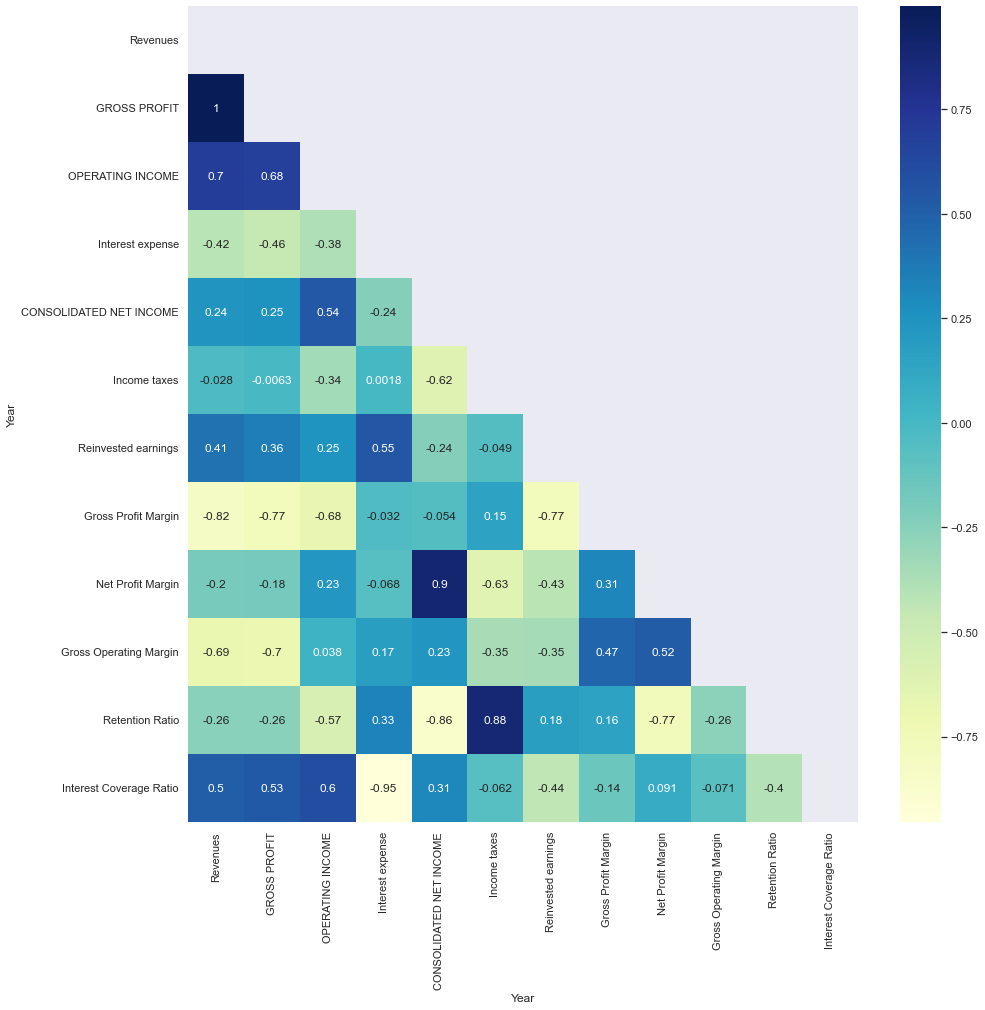

In [50]:
# Correlating the dataset
mask = np.triu(np.ones_like(coke_income_data.corr()))
 
# plotting a triangle correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(coke_income_data.corr(), cmap="YlGnBu", annot=True, mask=mask)

Profit Margin, income taxes are negatively correlating with revenues.

In [42]:
# Plotting a line graph to show the trends in income parameters
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=coke_income_data.index, y=coke_income_data.Revenues,
    name='Revenues',
    marker_color="indianred",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_income_data.index, y=coke_income_data['GROSS PROFIT'],
    name='Gross Profit',
    marker_color="teal",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_income_data.index, y=coke_income_data['OPERATING INCOME'],
    name='Operating Income',
    marker_color="lightsalmon",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_income_data.index, y=coke_income_data['CONSOLIDATED NET INCOME'],
    name='Net Income',
    marker_color="maroon",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_income_data.index, y=coke_income_data['Income taxes'],
    name='Income Taxes',
    marker_color="firebrick",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_income_data.index, y=coke_income_data['Interest expense'],
    name='Interest Expense',
    marker_color="firebrick",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_income_data.index, y=coke_income_data['Reinvested earnings'],
    name='Reinvested Earnings',
    marker_color="firebrick",
    mode = 'lines'
))
fig.update_layout(
    title={
        'text': "Coca-Cola Income Trends ",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Revenues, operating income and gross profit dropped from 2012 to 2018. Income taxes was low but spiked in 2017. Interest expense and reinvested earnings was on the increase. 

In [45]:
# Plotting a line graph to show the trends in income KPIs
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=coke_income_data.index, y=coke_income_data['Net Profit Margin'],
    name='Net Profit Margin',
    marker_color="teal",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_income_data.index, y=coke_income_data['Retention Ratio'],
    name='Retention Ratio',
    marker_color="lightsalmon",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_income_data.index, y=coke_income_data['Interest Coverage Ratio'],
    name='Interest Coverage Ratio',
    marker_color="firebrick",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_income_data.index, y=coke_income_data['Gross Profit Margin'],
    name='Gross Profit Margin',
    marker_color="firebrick",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_income_data.index, y=coke_income_data['Gross Operating Margin'],
    name='Gross Operating Margin',
    marker_color="firebrick",
    mode = 'lines'
))
fig.update_layout(
    title={
        'text': "Coca-Cola Income KPIs Trends ",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Net profit margin dropped from 2010 to 2017, Retention ratio spiked in 2017, Interest coverage ratio and gross profit and operating margin dropped from 2012 to 2017, 

### Cash Balance Data

In [46]:
# Selecting the columns from the raw dataset we need and analysing for balance KPIs
coke_balance_data = coke_data[['TOTAL ASSETS', 'TOTAL CURRENT ASSETS', 'TOTAL CURRENT LIABILITIES', 'TOTAL EQUITY', 'TOTAL CASH, CASH EQUIVALENTS AND SHORT-TERM INVESTMENTS', 'Inventories']]
coke_balance_data['Current Ratio'] = coke_balance_data['TOTAL CURRENT ASSETS'] / coke_balance_data['TOTAL CURRENT LIABILITIES']
coke_balance_data['Quick Ratio'] = (coke_balance_data['TOTAL CURRENT ASSETS'] - coke_balance_data['Inventories']) / coke_balance_data['TOTAL CURRENT LIABILITIES']
coke_balance_data['Debt to Equity'] = coke_balance_data['TOTAL CURRENT LIABILITIES'] / coke_balance_data['TOTAL EQUITY']
coke_balance_data['Debt to Assets'] = coke_balance_data['TOTAL CURRENT LIABILITIES'] / coke_balance_data['TOTAL ASSETS']
coke_balance_data

C:\Users\ALIENWARE\AppData\Local\Temp/ipykernel_14100/3895989175.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ALIENWARE\AppData\Local\Temp/ipykernel_14100/3895989175.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ALIENWARE\AppData\Local\Temp/ipykernel_14100/3895989175.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

Year,TOTAL ASSETS,TOTAL CURRENT ASSETS,TOTAL CURRENT LIABILITIES,TOTAL EQUITY,"TOTAL CASH, CASH EQUIVALENTS AND SHORT-TERM INVESTMENTS",Inventories,Current Ratio,Quick Ratio,Debt to Equity,Debt to Assets
2009,48671.0,17551.0,13721.0,25346.0,9151.0,2354.0,1.279134,1.107572,0.541348,0.281913
2010,72921.0,21579.0,18508.0,31317.0,11199.0,2650.0,1.165928,1.022747,0.590989,0.253809
2011,79974.0,25497.0,24283.0,31921.0,13891.0,3092.0,1.049994,0.922662,0.760722,0.303636
2012,86174.0,30328.0,27821.0,33168.0,13459.0,3264.0,1.090112,0.972790,0.838790,0.322847
2013,90055.0,31304.0,27811.0,33440.0,17121.0,3277.0,1.125598,1.007767,0.831669,0.308822
2014,92023.0,32986.0,32374.0,30561.0,18010.0,3100.0,1.018904,0.923148,1.059324,0.351803
2015,90093.0,33395.0,26930.0,25764.0,15631.0,2902.0,1.240067,1.132306,1.045257,0.298913
2016,87270.0,34010.0,26532.0,23220.0,18150.0,2675.0,1.281848,1.181027,1.142636,0.304022
2017,87896.0,36545.0,27194.0,18977.0,15358.0,2655.0,1.343863,1.246231,1.432998,0.309388
2018,83216.0,24930.0,28782.0,19058.0,11102.0,3071.0,0.866166,0.759468,1.510232,0.345871


<AxesSubplot:xlabel='Year', ylabel='Year'>

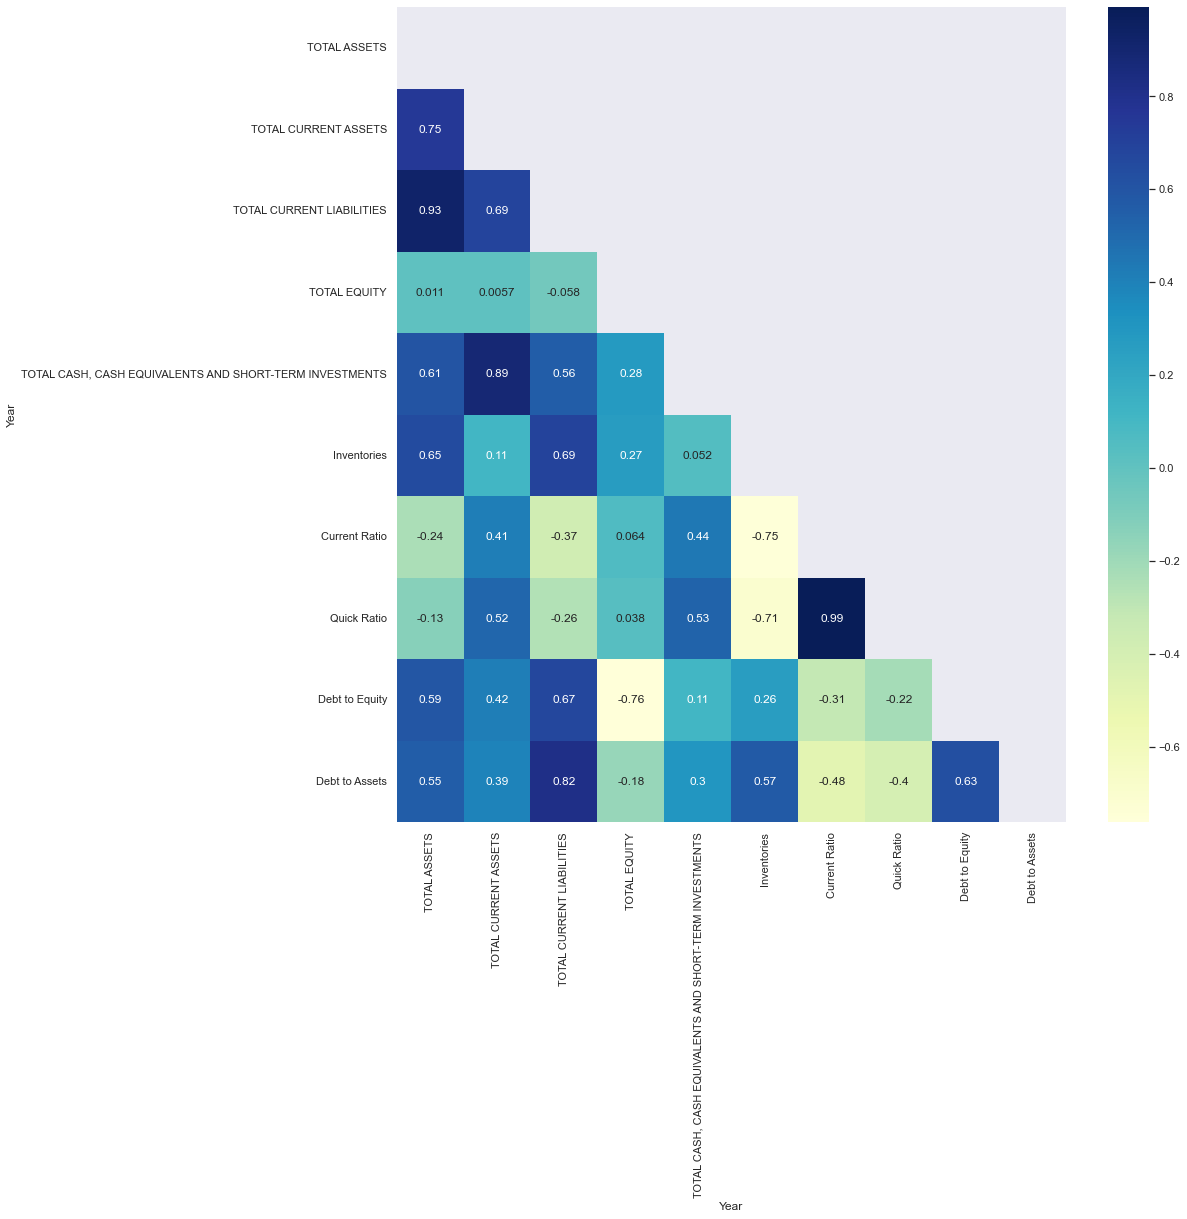

In [49]:
# Correlating the dataset
mask = np.triu(np.ones_like(coke_balance_data.corr()))
 
# plotting a triangle correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(coke_balance_data.corr(), cmap="YlGnBu", annot=True, mask=mask)

Total assets and total liabilities are highly correlated.

In [52]:
# Plotting a line graph to show the cash balance trends
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=coke_balance_data.index, y=coke_balance_data['TOTAL CURRENT ASSETS'],
    name='Total Assets',
    marker_color="indianred",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_balance_data.index, y=coke_balance_data['TOTAL CURRENT LIABILITIES'],
    name='Total Liabilities',
    marker_color="teal",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_balance_data.index, y=coke_balance_data['TOTAL EQUITY'],
    name='Total Equity',
    marker_color="lightsalmon",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_balance_data.index, y=coke_balance_data['TOTAL CASH, CASH EQUIVALENTS AND SHORT-TERM INVESTMENTS'],
    name='Total Cash',
    marker_color="maroon",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_balance_data.index, y=coke_balance_data['Inventories'],
    name='Inventories',
    marker_color="firebrick",
    mode = 'lines'
))
fig.update_layout(
    title={
        'text': "Coca-Cola Cash Balance Trends ",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Total assets rose steadily over the years but dropped sharply in 2017. Total liabilities rose but plateaued over the years. Total equity plateaued but dropped sharply in 2013. Total cash rose and peaked in 2014, plateaued and then dropped sharply in 2016. Inventries rose and dropped steadily in 2013 to rise again in 2016.

In [53]:
# Plotting a line graph to show the cash balance KPIs
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=coke_balance_data.index, y=coke_balance_data['Quick Ratio'],
    name='Quick Ratio',
    marker_color="indianred",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_balance_data.index, y=coke_balance_data['Debt to Equity'],
    name='Debt to Equity',
    marker_color="teal",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_balance_data.index, y=coke_balance_data['Debt to Assets'],
    name='Debt to Assets',
    marker_color="lightsalmon",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_balance_data.index, y=coke_balance_data['Current Ratio'],
    name='Current Ratio',
    marker_color="firebrick",
    mode = 'lines'
))
fig.update_layout(
    title={
        'text': "Coca-Cola Cash Balance KPIs Trends ",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Quick ratio and current ratio remained the same over the years but dropped from 2017. Debt to equity rose over the years, and debt to assets plateaued over the years

Income and Balance Data

In [54]:
coke_returns = pd.DataFrame()
coke_returns['TOTAL ASSETS MA'] = coke_balance_data['TOTAL ASSETS'].transform(lambda x: x.rolling(11, 1).mean())
coke_returns['TOTAL EQUITY MA'] = coke_balance_data['TOTAL EQUITY'].transform(lambda x: x.rolling(11, 1).mean())
coke_returns

,TOTAL ASSETS MA,TOTAL EQUITY MA
2009,48671.000000,25346.000000
2010,60796.000000,28331.500000
2011,67188.666667,29528.000000
2012,71935.000000,30438.000000
2013,75559.000000,31038.400000
2014,78303.000000,30958.833333
2015,79987.285714,30216.714286
2016,80897.625000,29342.125000
2017,81675.222222,28190.444444
2018,81829.300000,27277.200000


In [55]:
coke_returns['Return on Assets'] = (coke_income_data['CONSOLIDATED NET INCOME'] / coke_returns['TOTAL ASSETS MA'])*100
coke_returns['Return on Equity'] = (coke_income_data['CONSOLIDATED NET INCOME'] / coke_returns['TOTAL EQUITY MA'])*100
coke_returns

,TOTAL ASSETS MA,TOTAL EQUITY MA,Return on Assets,Return on Equity
2009,48671.000000,25346.000000,14.189148,27.246903
2010,60796.000000,28331.500000,19.506218,41.858003
2011,67188.666667,29528.000000,12.850382,29.240043
2012,71935.000000,30438.000000,12.630847,29.850844
2013,75559.000000,31038.400000,11.416244,27.791381
2014,78303.000000,30958.833333,9.097991,23.011203
2015,79987.285714,30216.714286,9.208964,24.377237
2016,80897.625000,29342.125000,8.096653,22.322855
2017,81675.222222,28190.444444,1.570856,4.551188
2018,81829.300000,27277.200000,7.914036,23.741440


In [56]:
# Plotting a line graph to show the cash balance trends
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=coke_returns.index, y=coke_returns['Return on Assets'],
    name='Return on Assets',
    marker_color="indianred",
    mode = 'lines'
))
fig.add_trace(go.Scatter(
    x=coke_returns.index, y=coke_returns['Return on Equity'],
    name='Return on Equity',
    marker_color="teal",
    mode = 'lines'
))
fig.update_layout(
    title={
        'text': "Coca-Cola Cash Returns Trends ",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Returns on assets and equity plateaued over the years but dipped in 2017